# Summary:
This notebook contains the iterative soft smoothing for Amherst (Figure 5(c)).

## load libraries

In [3]:
# import packages
from __future__ import division

import networkx as nx
import os
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt
import itertools

from numpy.linalg import inv

## function to create + save dictionary of features
def create_dict(key, obj):
    return(dict([(key[i], obj[i]) for i in range(len(key))]))

## load helper functions and dataset

In [11]:
# set the working directory and import helper functions
#get the current working directory and then redirect into the functions under code 
cwd = os.getcwd()

# parents working directory of the current directory: which is the code folder
parent_cwd = os.path.dirname(cwd)
# get into the functions folder
functions_cwd = parent_cwd + '/functions'
# change the working directory to be .../functions
os.chdir(functions_cwd)

# import all helper functions
exec(open('parsing.py').read())
exec(open('ZGL.py').read())
exec(open('create_graph.py').read())
exec(open('iterative_decoupled_method.py').read())
exec(open('decoupling_prepare.py').read())

# import the data from the data folder
data_cwd = os.path.dirname(parent_cwd)+ '/data'

# change the working directory and import the fb dataset
fb100_file = data_cwd +'/Amherst41'

A, metadata = parse_fb100_mat_file(fb100_file)

# change A(scipy csc matrix) into a numpy matrix
adj_matrix_tmp = A.todense()
#get the gender for each node(1/2,0 for missing)
gender_y_tmp = metadata[:,1] 
# get the corresponding gender for each node in a disctionary form
gender_dict = create_dict(range(len(gender_y_tmp)), gender_y_tmp)

(graph, gender_y)  = create_graph(adj_matrix_tmp,gender_dict,'gender',0,None,'yes') 

## general setup

In [ ]:
percent_initially_unlabelled = [0.99,0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05] 
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled) 
n_iter = 10
cv_setup='stratified'
classes = np.sort(np.unique(gender_y))
class_labels = np.array(range(len(classes)))

## iterative decoupled method

In [9]:
mean_accuracy_two = []
se_accuracy_two = []

mean_micro_auc_two = []
se_micro_auc_two = []

mean_wt_auc_two = []
se_wt_auc_two = []




mean_accuracy_iter2 = []
se_accuracy_iter2 = []

mean_micro_auc_iter2 = []
se_micro_auc_iter2 = []

mean_wt_auc_iter2 = []
se_wt_auc_iter2 = []



mean_accuracy_iter3 = []
se_accuracy_iter3 = []

mean_micro_auc_iter3 = []
se_micro_auc_iter3 = []

mean_wt_auc_iter3 = []
se_wt_auc_iter3 = []



mean_accuracy_iter4 = []
se_accuracy_iter4 = []

mean_micro_auc_iter4 = []
se_micro_auc_iter4 = []

mean_wt_auc_iter4 = []
se_wt_auc_iter4 = []


mean_accuracy_iter5 = []
se_accuracy_iter5 = []

mean_micro_auc_iter5 = []
se_micro_auc_iter5 = []

mean_wt_auc_iter5 = []
se_wt_auc_iter5 = []



mean_accuracy_iter6 = []
se_accuracy_iter6 = []

mean_micro_auc_iter6 = []
se_micro_auc_iter6 = []

mean_wt_auc_iter6 = []
se_wt_auc_iter6 = []



(graph_new, gender_y_new)  = create_graph(adj_matrix_tmp,gender_dict,'gender',0,None,'yes')
adj_matrix_gender = np.array(nx.adjacency_matrix(graph_new).todense()) 
    
    
gender_dict_input = create_dict(range(len(gender_y_new)), gender_y_new)
    
(graph_input, gender_y_input)  = create_graph(adj_matrix_gender,gender_dict_input,'gender',5,None,'yes')
adj_matrix_input = np.array(nx.adjacency_matrix(graph_input).todense()) 




for i in range(len(percent_initially_labelled)):
    print(percent_initially_unlabelled[i]) 
#     (adj_noBnoO_osbm, y_noBnoO_osbm) =  create_affiliation_model_temp(8,
#                                           lambda_block_parameter = 1.2,
#                                           dispersion_parameter_vect = np.array([np.array([0, 0]),
#                                             np.array([0, 0])]), 
#                                           class_size_vect = np.array([100,100]))
    
    
################################################################################ 
    keys = list(graph_input.node())
    #print(keys)
    
    bench_mark = np.mean(np.array(gender_y_input) == np.max(class_labels))

    if cv_setup=='stratified':
        k_fold = StratifiedShuffleSplit(n_splits=n_iter,test_size=percent_initially_unlabelled[i],
                                                     random_state=1)

    else:
        k_fold = cross_validation.ShuffleSplit(n_splits=n_iter,
                                           test_size=percent_initially_unlabelled[i],
                                           random_state=None)
    accuracy_one = [] 
    micro_auc_one = []
    wt_auc_one = []
    
    
    accuracy_two = [] 
    micro_auc_two = []
    wt_auc_two = []

    accuracy_iter2 = [] 
    micro_auc_iter2 = []
    wt_auc_iter2 = []
    
    accuracy_iter3 = [] 
    micro_auc_iter3 = []
    wt_auc_iter3 = []
    
    accuracy_iter4 = [] 
    micro_auc_iter4 = []
    wt_auc_iter4 = []
     
    accuracy_iter5 = [] 
    micro_auc_iter5 = []
    wt_auc_iter5 = []
    
    accuracy_iter6 = [] 
    micro_auc_iter6 = []
    wt_auc_iter6 = []    

    
    # update rule for theta
    for train_index, test_index in k_fold.split(keys, gender_y_input):
        accuracy_score_benchmark = np.mean(np.array(gender_y_input)[train_index] == np.max(class_labels))
#         # get 1-hop result
#         (theta_one_tmp, micro_auc_one_tmp, wt_auc_one_tmp, accuracy_one_tmp) = one_hop_majority_vote(graph_input, gender_y_input,train_index, test_index)
#         accuracy_one.append(accuracy_one_tmp)
#         micro_auc_one.append(micro_auc_one_tmp)
#         wt_auc_one.append(wt_auc_one_tmp)
        # get 2-hop result(iteration 1)
        bench_mark = gender_y_input/len(gender_y_input)
        (theta_two_tmp, micro_auc_two_tmp, wt_auc_two_tmp, accuracy_two_tmp) = iterative_decoupled_method(1, graph_input, gender_y_input, gender_y_input, train_index, test_index)
        accuracy_two.append(accuracy_two_tmp)
        micro_auc_two.append(micro_auc_two_tmp)
        wt_auc_two.append(wt_auc_two_tmp)
        # get iteration 2 result
        #bench_mark = gender_y_input/len(gender_y_input)
        (theta_iter2_tmp, micro_auc_iter2_tmp, wt_auc_iter2_tmp, accuracy_iter2_tmp) = iterative_decoupled_method(2, graph_input, gender_y_input, theta_two_tmp, train_index, test_index)
        accuracy_iter2.append(accuracy_iter2_tmp)
        micro_auc_iter2.append(micro_auc_iter2_tmp)
        wt_auc_iter2.append(wt_auc_iter2_tmp)
        # get iteration 3 result        
        (theta_iter3_tmp, micro_auc_iter3_tmp, wt_auc_iter3_tmp, accuracy_iter3_tmp) = iterative_decoupled_method(3, graph_input, gender_y_input, theta_iter2_tmp, train_index, test_index)
        accuracy_iter3.append(accuracy_iter3_tmp)
        micro_auc_iter3.append(micro_auc_iter3_tmp)
        wt_auc_iter3.append(wt_auc_iter3_tmp)
        
        # get iteration 4 result        
        (theta_iter4_tmp, micro_auc_iter4_tmp, wt_auc_iter4_tmp, accuracy_iter4_tmp) = iterative_decoupled_method(4, graph_input, gender_y_input, theta_iter3_tmp, train_index, test_index)
        accuracy_iter4.append(accuracy_iter4_tmp)
        micro_auc_iter4.append(micro_auc_iter4_tmp)
        wt_auc_iter4.append(wt_auc_iter4_tmp)        
        
        # get iteration 5 result        
        (theta_iter5_tmp, micro_auc_iter5_tmp, wt_auc_iter5_tmp, accuracy_iter5_tmp) = iterative_decoupled_method(5, graph_input, gender_y_input, theta_iter4_tmp, train_index, test_index)
        accuracy_iter5.append(accuracy_iter5_tmp)
        micro_auc_iter5.append(micro_auc_iter5_tmp)
        wt_auc_iter5.append(wt_auc_iter5_tmp) 

        (theta_iter6_tmp, micro_auc_iter6_tmp, wt_auc_iter6_tmp, accuracy_iter6_tmp) = iterative_decoupled_method(6, graph_input, gender_y_input, theta_iter5_tmp, train_index, test_index)
        accuracy_iter6.append(accuracy_iter6_tmp)
        micro_auc_iter6.append(micro_auc_iter6_tmp)
        wt_auc_iter6.append(wt_auc_iter6_tmp)
        
        
        
    # get the mean and standard deviation for 1-hop MV
#     mean_accuracy_one.append(np.mean(accuracy_one))  
#     se_accuracy_one.append(np.std(accuracy_one)) 
        
#     mean_micro_auc_one.append(np.mean(micro_auc_one))
#     se_micro_auc_one.append(np.std(micro_auc_one))
    
#     mean_wt_auc_one.append(np.mean(wt_auc_one))
#     se_wt_auc_one.append(np.std(wt_auc_one))    
    
    # get the mean and standard deviation for 2-hop MV
    mean_accuracy_two.append(np.mean(accuracy_two))  
    se_accuracy_two.append(np.std(accuracy_two)) 
        
    mean_micro_auc_two.append(np.mean(micro_auc_two))
    se_micro_auc_two.append(np.std(micro_auc_two))
    
    mean_wt_auc_two.append(np.mean(wt_auc_two))
    se_wt_auc_two.append(np.std(wt_auc_two)) 

    
    # get the mean and standard deviation for iter 2
    mean_accuracy_iter2.append(np.mean(accuracy_iter2))  
    se_accuracy_iter2.append(np.std(accuracy_iter2)) 
        
    mean_micro_auc_iter2.append(np.mean(micro_auc_iter2))
    se_micro_auc_iter2.append(np.std(micro_auc_iter2))
    
    mean_wt_auc_iter2.append(np.mean(wt_auc_iter2))
    se_wt_auc_iter2.append(np.std(wt_auc_iter2))
    
    # get the mean and standard deviation for iter 3
    mean_accuracy_iter3.append(np.mean(accuracy_iter3))  
    se_accuracy_iter3.append(np.std(accuracy_iter3)) 
        
    mean_micro_auc_iter3.append(np.mean(micro_auc_iter3))
    se_micro_auc_iter3.append(np.std(micro_auc_iter3))
    
    mean_wt_auc_iter3.append(np.mean(wt_auc_iter3))
    se_wt_auc_iter3.append(np.std(wt_auc_iter3)) 
    
    # get the mean and standard deviation for iter 4
    mean_accuracy_iter4.append(np.mean(accuracy_iter4))  
    se_accuracy_iter4.append(np.std(accuracy_iter4)) 
        
    mean_micro_auc_iter4.append(np.mean(micro_auc_iter4))
    se_micro_auc_iter4.append(np.std(micro_auc_iter4))
    
    mean_wt_auc_iter4.append(np.mean(wt_auc_iter4))
    se_wt_auc_iter4.append(np.std(wt_auc_iter4)) 

    # get the mean and standard deviation for iter 5
    mean_accuracy_iter5.append(np.mean(accuracy_iter5))  
    se_accuracy_iter5.append(np.std(accuracy_iter5)) 
        
    mean_micro_auc_iter5.append(np.mean(micro_auc_iter5))
    se_micro_auc_iter5.append(np.std(micro_auc_iter5))
    
    mean_wt_auc_iter5.append(np.mean(wt_auc_iter5))
    se_wt_auc_iter5.append(np.std(wt_auc_iter5))
    
    
    # get the mean and standard deviation for iter 6
    mean_accuracy_iter6.append(np.mean(accuracy_iter6))  
    se_accuracy_iter6.append(np.std(accuracy_iter6)) 
        
    mean_micro_auc_iter6.append(np.mean(micro_auc_iter6))
    se_micro_auc_iter6.append(np.std(micro_auc_iter6))
    
    mean_wt_auc_iter6.append(np.mean(wt_auc_iter6))
    se_wt_auc_iter6.append(np.std(wt_auc_iter6))
    

0.99


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(genera

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.95


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generat

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(genera

0.9


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.8


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

0.7


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

0.6


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

0.5


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.4


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.f

0.3


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.2


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.1


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

0.05


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fr

## decoupled smoothing with sigma_square = 0.1

In [12]:
sigma_square = 0.1
graph = nx.from_numpy_matrix(adj_matrix_input)
gender_y = gender_y_input
   
A_tilde = decoupling_prepare(graph,sigma_square)
(mean_accuracy_decoupling_amherst,se_accuracy_decoupling_amherst,mean_micro_auc_decoupling_amherst,se_micro_auc_decoupling_amherst,mean_wt_auc_decoupling_amherst,se_wt_auc_decoupling_amherst) = ZGL(np.array(A_tilde),gender_y,percent_initially_unlabelled, n_iter, cv_setup)

0.99


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

0.95


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9


/Users/yatong_chen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05


## Plot

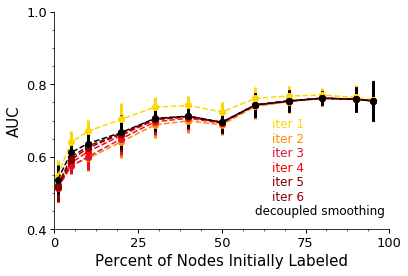

In [14]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
#seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([0,25,50,75,100]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.4, 0.5,0.6,0.7,0.8,0.9,1]))
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_two, 
            yerr=se_wt_auc_two, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='gold')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_iter2, 
            yerr=se_wt_auc_iter2, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='darkorange')
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_iter3, 
            yerr=se_wt_auc_iter3, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='crimson')
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_iter4, 
            yerr=se_wt_auc_iter4, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='red') 
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_iter5, 
            yerr=se_wt_auc_iter5, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='maroon') 
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_iter6, 
            yerr=se_wt_auc_iter6, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='darkred') 
        
        grid[i].errorbar(percent_initially_labelled*100, mean_wt_auc_decoupling_amherst, 
            yerr=se_wt_auc_decoupling_amherst, fmt='--o', capthick=2,
                alpha=1, elinewidth=3, color='black') 


        
     
        
        grid[i].set_ylim(0.3,1.1)
        grid[i].set_xlim(0,101)
     
    
        grid[i].annotate('iter 1', xy=(65, 0.68), 
                 color='gold', alpha=1, size=12)
        grid[i].annotate('iter 2', xy=(65, 0.64), 
                 color='darkorange', alpha=1, size=12)
        grid[i].annotate('iter 3', xy=(65, 0.60), 
                 color='crimson', alpha=1, size=12)
        
        grid[i].annotate('iter 4', xy=(65, 0.56), 
                 color='red', alpha=1, size=12)

        grid[i].annotate('iter 5', xy=(65, 0.52), 
                 color='maroon', alpha=1, size=12)
        
        grid[i].annotate('iter 6', xy=(65, 0.48), 
                 color='darkred', alpha=1, size=12)
        grid[i].annotate('decoupled smoothing', xy=(60, 0.44), 
                 color='black', alpha=1, size=12)

        

        

        grid[i].set_ylim(0.4,1)
        grid[i].set_xlim(0,100)
                         
        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Percent of Nodes Initially Labeled').set_fontsize(15)
        grid[i].set_ylabel('AUC').set_fontsize(15)

#plt.setp(ax1, xticks=[0,25, 50, 75, 100], xticklabels=['0', '25', '50', '75', '100'])
grid[0].set_xticks([0,25, 50, 75, 100])
grid[0].set_yticks([0.4,0.6, 0.8,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
#plt.show()
#pp = PdfPages('../../figures/Amherst_College_Inference.pdf')
#pp.savefig()
#pp.close()